In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('assets/fruit_data_with_colors.txt')

In [2]:
from matplotlib import cm

X = fruits[['height', 'width', 'mass']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

42    3
48    4
7     2
14    1
32    3
49    4
29    3
37    3
56    4
18    1
55    4
27    3
15    1
5     2
31    3
16    1
50    4
20    1
51    4
8     1
13    1
25    3
17    1
58    4
57    4
52    4
38    3
1     1
12    1
45    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
54    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64

<IPython.core.display.Javascript object>


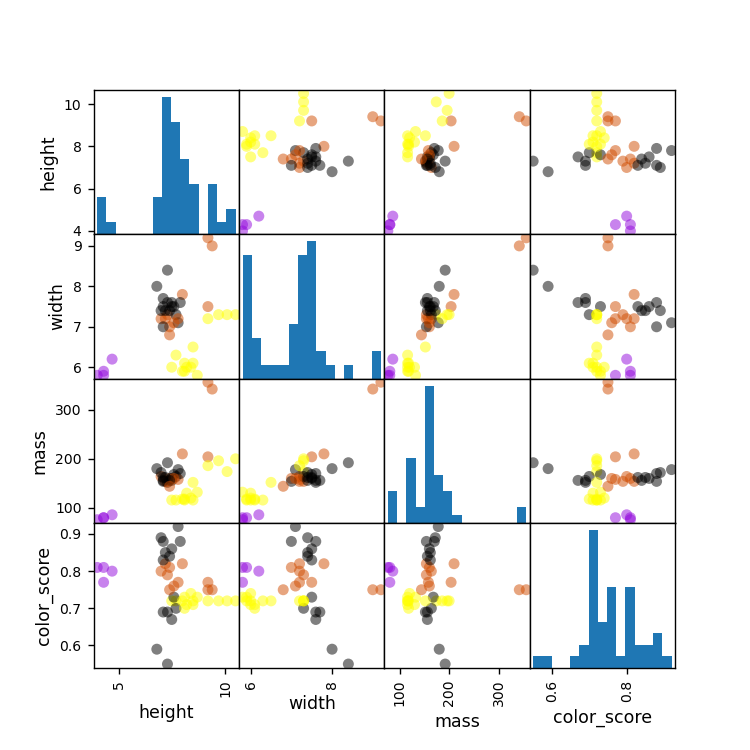

In [3]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s = 40, hist_kwds = {'bins':15}, figsize = (6,6), cmap = cmap)

<IPython.core.display.Javascript object>


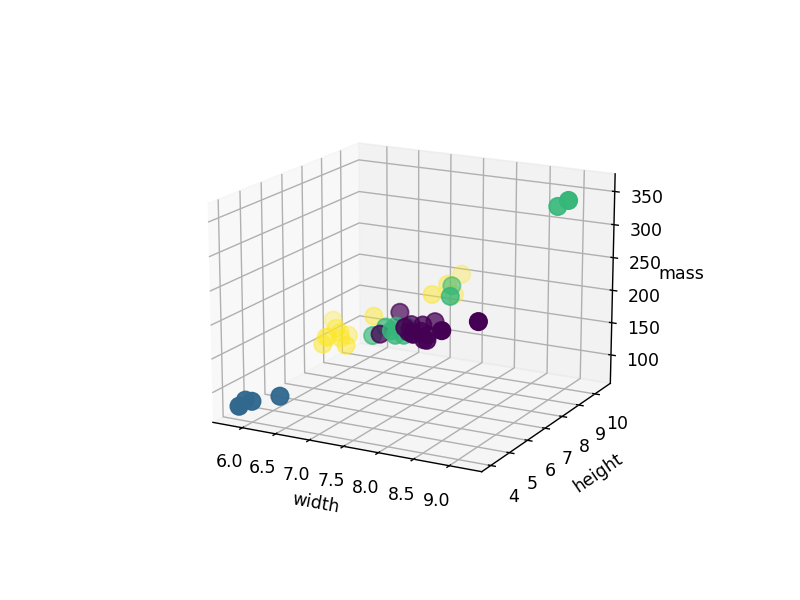

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'],X_train['height'],X_train['mass'],c=y_train, marker = 'o', s =100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('mass')
plt.show()

In [5]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))

lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
knn.score(X_test, y_test) # accuracy is defined as the fraction of test set items whose true label was correctly predicted by the classifier

0.5333333333333333

In [8]:
fruit_prediction = knn.predict([[10.5,9.5,100]])
lookup_fruit_name[fruit_prediction[0]]

F:\Program Files\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

In [1]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

ModuleNotFoundError: No module named 'adspy_shared_utilities'

<IPython.core.display.Javascript object>


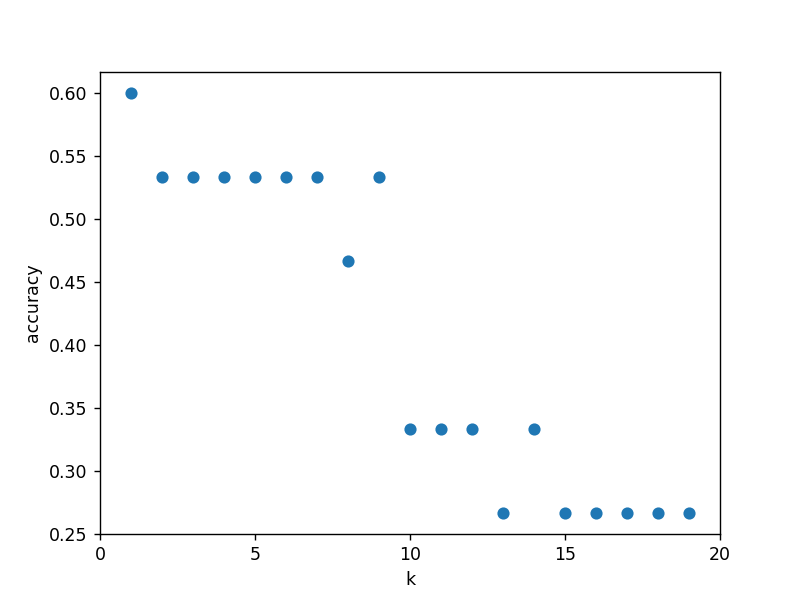

([<matplotlib.axis.XTick at 0x18f3e6c31f0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

In [10]:
k_range = range(1,20)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])